In [21]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

Supermarket consumer behaviour dataset consists of 2019501 Rows & 12 Columns :

order_id – (A unique number to identity the order)

user_id - (A unique number to identify the user)

order_number – (Number of the order)

order_dow – (Day of the Week the order was made)

orderhourof_day – (Time of the order)
dayssinceprior_order - (History of the order)
product_id – (Id of the product)
addtocart_order – (Number of items added to cart)
reordered – (If the reorder took place)
department_id - (Unique number allocated to each department)
department – (Names of the departments)
product_name – (Name of the products)

In [2]:
df = pd.read_csv("ECommerce_consumer.csv")
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce


In [3]:
clst_prd = pd.crosstab(df['order_id'], df['department_id'])
clst_prd

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
order_id,,,,,,,,,,,,,,,,,,,,,
10,0,0,0,10,0,0,0,0,0,0,...,1,0,0,1,1,0,2,0,0,0
11,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0
28,0,0,0,6,0,0,0,0,0,0,...,1,1,0,0,8,0,0,0,0,0
38,1,0,0,6,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
56,1,0,0,3,0,0,1,0,0,0,...,0,1,0,1,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3420991,1,0,0,5,0,0,2,0,0,0,...,0,0,0,0,1,0,0,3,1,0
3421019,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3421027,0,0,0,5,0,0,0,0,0,0,...,1,0,1,1,2,0,0,2,0,0


In [4]:
df1=clst_prd

In [45]:
df2=clst_prd

In [5]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()


df_scaled = std_scale.fit_transform(df1)


In [6]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

Elbow Method to determine the number of clusters to be formed:


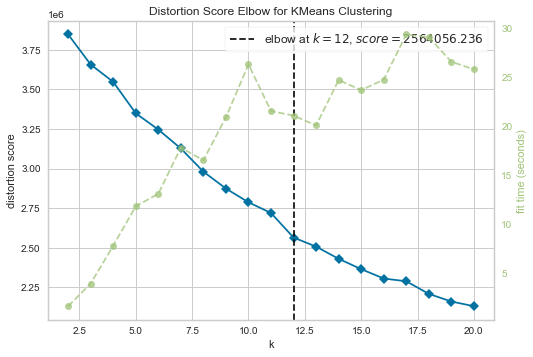

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=20)
Elbow_M.fit(df_scaled)
Elbow_M.show()

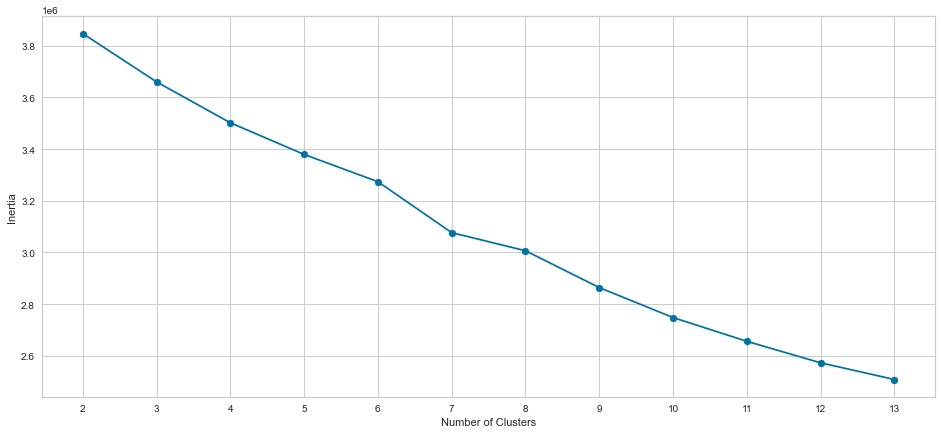

In [8]:
inertia = []
list_num_clusters = list(range(2,14))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(df_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=[16,7])
plt.plot(list_num_clusters, inertia)
plt.scatter(list_num_clusters, inertia)
plt.xticks(range(2,14))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

In [9]:
km = KMeans(n_clusters=12)
km.fit_predict(df_scaled)


array([2, 1, 2, ..., 2, 1, 1])

In [11]:
df1["prediction"] = km.labels_


In [12]:
df1.prediction.value_counts()

1     107047
2      21441
6      18068
11     13085
3      10387
9      10343
10      8582
7       3842
8       2091
0       2064
5       1954
4       1096
Name: prediction, dtype: int64

In [13]:
df_scaled

array([[-0.55479996, -0.10196762, -0.52750567, ..., -0.58131523,
        -0.47923414, -0.13442706],
       [ 0.24040695, -0.10196762, -0.52750567, ...,  0.06211694,
         0.99135056, -0.13442706],
       [-0.55479996, -0.10196762, -0.52750567, ..., -0.58131523,
        -0.47923414, -0.13442706],
       ...,
       [-0.55479996, -0.10196762, -0.52750567, ...,  0.70554911,
        -0.47923414, -0.13442706],
       [ 0.24040695, -0.10196762, -0.52750567, ..., -0.58131523,
         0.99135056, -0.13442706],
       [ 0.24040695, -0.10196762, -0.52750567, ..., -0.58131523,
        -0.47923414, -0.13442706]])

In [14]:
rf = RandomForestClassifier()
rf.fit(df_scaled, df1.prediction)

RandomForestClassifier()

In [15]:
importances = pd.DataFrame({'Feature': df1.iloc[:,:-1].columns, 'Importance': np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Feature').head(12)
importances

,Importance
Feature,
12,0.193
1,0.114
6,0.096
14,0.066
11,0.056
16,0.047
4,0.044
17,0.044
15,0.043


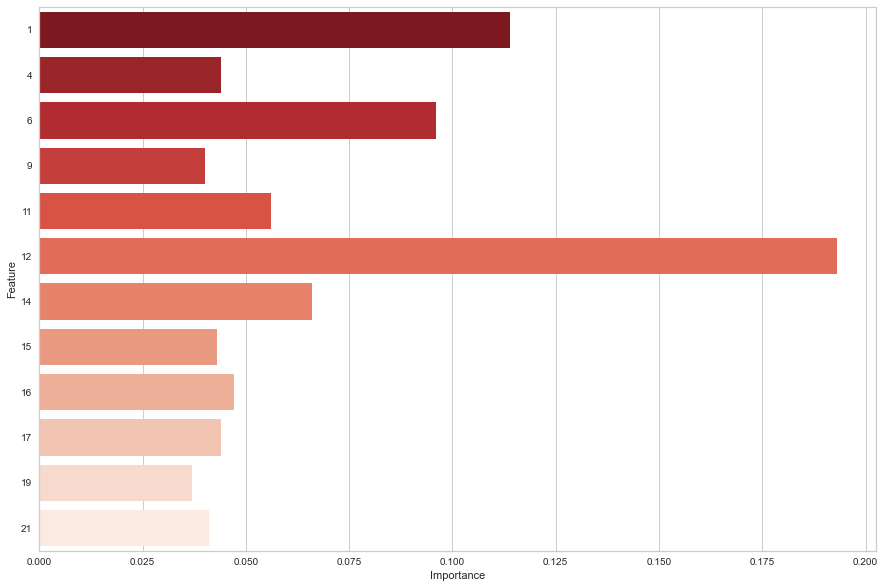

In [16]:
plt.figure(figsize=[15,10])
sns.barplot(x=importances.Importance, y=importances.index, orient='h', palette='Reds_r');

In [18]:
df.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
count,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,1.895159e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06
mean,1.707013e+06,1.030673e+05,1.715138e+01,2.735367e+00,1.343948e+01,1.138603e+01,7.120590e+01,8.363173e+00,5.897427e-01,9.928349e+00
std,9.859832e+05,5.949117e+04,1.752576e+01,2.093882e+00,4.241008e+00,8.970980e+00,3.820727e+01,7.150059e+00,4.918804e-01,6.282933e+00
min,1.000000e+01,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,8.526490e+05,5.158400e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.100000e+01,3.000000e+00,0.000000e+00,4.000000e+00
50%,1.705004e+06,1.026900e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,8.300000e+01,6.000000e+00,1.000000e+00,9.000000e+00
75%,2.559031e+06,1.546000e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.070000e+02,1.100000e+01,1.000000e+00,1.600000e+01
max,3.421080e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,1.340000e+02,1.370000e+02,1.000000e+00,2.100000e+01


In [19]:
#Creating a copy of data
#ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
#cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
#ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(df1)
scaled_ds = pd.DataFrame(scaler.transform(df1),columns= df1.columns )
print("All features are now scaled")

All features are now scaled


In [ ]:
from sklearn.decomposition import PCA

In [22]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,200000.0,-9.267809e-17,1.763864,-3.731530,-1.339046,-0.511673,1.030045,23.083418
col2,200000.0,1.097386e-17,1.237506,-8.013911,-0.651216,-0.095471,0.472092,17.891529
col3,200000.0,6.680489e-17,1.081573,-19.841775,-0.470019,0.042044,0.517604,22.579500


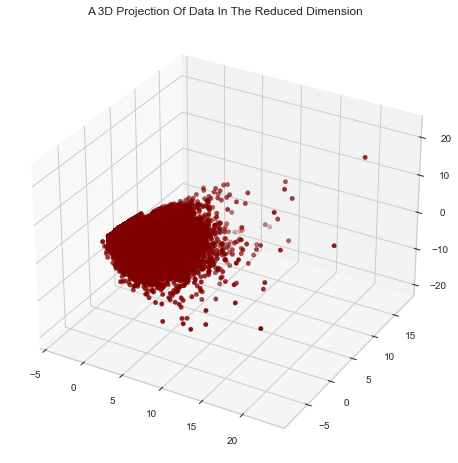

In [23]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [34]:
PCA_ds

,col1,col2,col3
0,-0.141936,-1.890762,-0.900169
1,-0.828781,-0.269223,-0.074981
2,0.469950,-1.761267,-0.144416
3,-0.986534,-0.539430,-0.235241
4,-0.446607,-0.596777,-0.317352
...,...,...,...
199995,-0.188917,-0.021346,1.354934
199996,-1.421482,-0.152120,-0.353729
199997,0.107164,-0.911160,0.229128
199998,-1.286443,-0.172939,0.346758


In [29]:
scaled_ds

department_id,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,prediction
0,-0.554800,-0.101968,-0.527506,2.220906,-0.127761,-0.244967,-0.635609,-0.101847,-0.404832,-0.101176,...,-0.555989,-0.371345,0.853737,-0.358401,-0.330723,2.425144,-0.581315,-0.479234,-0.134427,-0.393236
1,0.240407,-0.101968,-0.527506,-0.927074,-0.127761,-0.244967,-0.635609,-0.101847,-0.404832,-0.101176,...,0.400452,-0.371345,0.853737,-0.881939,-0.330723,-0.168177,0.062117,0.991351,-0.134427,-0.684396
2,-0.554800,-0.101968,-0.527506,0.961714,-0.127761,-0.244967,-0.635609,-0.101847,-0.404832,-0.101176,...,0.400452,-0.371345,-0.421002,3.306364,-0.330723,-0.168177,-0.581315,-0.479234,-0.134427,-0.393236
3,0.240407,-0.101968,-0.527506,0.961714,-0.127761,-0.244967,-0.635609,-0.101847,-0.404832,-0.101176,...,0.400452,-0.371345,-0.421002,-0.881939,-0.330723,-0.168177,0.062117,-0.479234,-0.134427,-0.684396
4,0.240407,-0.101968,-0.527506,0.017320,-0.127761,-0.244967,0.120501,-0.101847,-0.404832,-0.101176,...,0.400452,-0.371345,0.853737,0.688675,-0.330723,-0.168177,-0.581315,-0.479234,-0.134427,-0.684396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.240407,-0.101968,-0.527506,0.646916,-0.127761,-0.244967,0.876611,-0.101847,-0.404832,-0.101176,...,-0.555989,-0.371345,-0.421002,-0.358401,-0.330723,-0.168177,1.348981,0.991351,-0.134427,-0.684396
199996,0.240407,-0.101968,-0.527506,-0.927074,-0.127761,-0.244967,-0.635609,-0.101847,-0.404832,-0.101176,...,-0.555989,-0.371345,0.853737,-0.358401,-0.330723,-0.168177,-0.581315,-0.479234,-0.134427,-0.684396
199997,-0.554800,-0.101968,-0.527506,0.646916,-0.127761,-0.244967,-0.635609,-0.101847,-0.404832,-0.101176,...,-0.555989,1.293692,0.853737,0.165137,-0.330723,-0.168177,0.705549,-0.479234,-0.134427,-0.393236
199998,0.240407,-0.101968,-0.527506,-0.612276,-0.127761,-0.244967,-0.635609,-0.101847,-0.404832,-0.101176,...,-0.555989,-0.371345,-0.421002,-0.358401,-0.330723,-0.168177,-0.581315,0.991351,-0.134427,-0.684396


Elbow Method to determine the number of clusters to be formed:


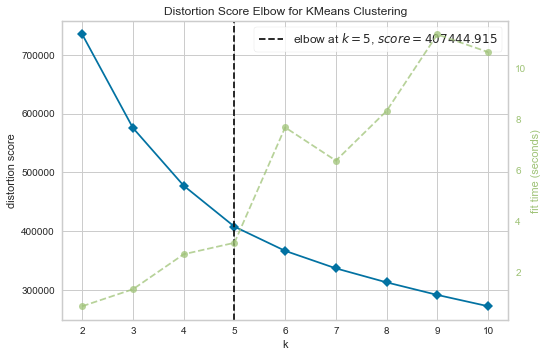

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
#fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df2["Clusters"]= yhat_AC


In [48]:
km = KMeans(n_clusters=5)
yhat_AC=km.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df2["Clusters"]= yhat_AC

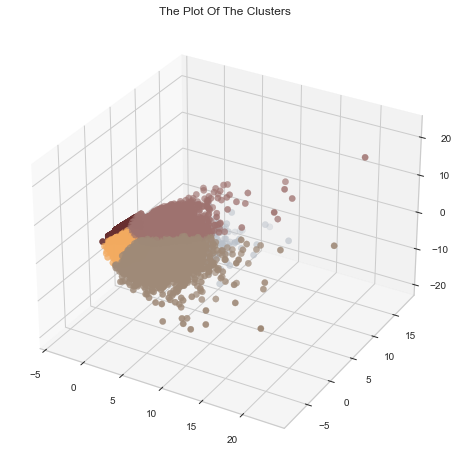

In [50]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

# EVALUATING MODELS

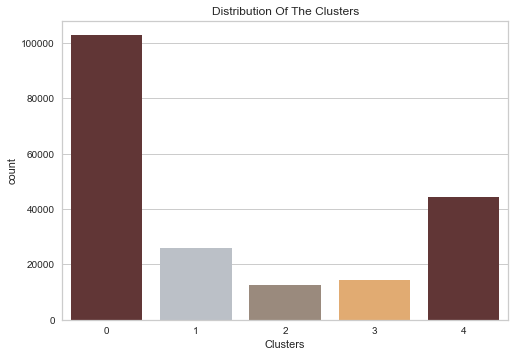

In [51]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df2["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [ ]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

In [56]:
df2

department_id,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,Clusters
order_id,,,,,,,,,,,,,,,,,,,,,
10,0,0,0,10,0,0,0,0,0,0,...,0,0,1,1,0,2,0,0,0,4
11,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,1,0,0
28,0,0,0,6,0,0,0,0,0,0,...,1,0,0,8,0,0,0,0,0,4
38,1,0,0,6,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
56,1,0,0,3,0,0,1,0,0,0,...,1,0,1,3,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3420991,1,0,0,5,0,0,2,0,0,0,...,0,0,0,1,0,0,3,1,0,0
3421019,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3421027,0,0,0,5,0,0,0,0,0,0,...,0,1,1,2,0,0,2,0,0,4


In [57]:
pl = sns.scatterplot(data = df2,x=df2["order_id"], y=df2["department_id"],hue=df2["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

KeyError: 'order_id'